<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Group-the-data" data-toc-modified-id="Group-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Group the data</a></span><ul class="toc-item"><li><span><a href="#Use-a-function-to-prevent-infinite-values-in-CR:" data-toc-modified-id="Use-a-function-to-prevent-infinite-values-in-CR:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Use a function to prevent infinite values in CR:</a></span></li><li><span><a href="#Use-a-for-loop-to-prevent-infinite-values-in-CR-with:" data-toc-modified-id="Use-a-for-loop-to-prevent-infinite-values-in-CR-with:-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Use a for loop to prevent infinite values in CR with:</a></span></li><li><span><a href="#Check-the-data-for-missing-values-and-NaN:" data-toc-modified-id="Check-the-data-for-missing-values-and-NaN:-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Check the data for missing values and NaN:</a></span></li><li><span><a href="#Check-for-outliers" data-toc-modified-id="Check-for-outliers-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Check for outliers</a></span></li><li><span><a href="#Remove-infinite-values:" data-toc-modified-id="Remove-infinite-values:-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Remove infinite values:</a></span><ul class="toc-item"><li><span><a href="#Exclude-the-rows-with-.drop():" data-toc-modified-id="Exclude-the-rows-with-.drop():-1.1.5.1"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Exclude the rows with .drop():</a></span></li><li><span><a href="#Exlude-those-two-rows-with-'!='" data-toc-modified-id="Exlude-those-two-rows-with-'!='-1.1.5.2"><span class="toc-item-num">1.1.5.2&nbsp;&nbsp;</span>Exlude those two rows with '!='</a></span></li></ul></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Elbow:" data-toc-modified-id="Elbow:-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Elbow:</a></span></li><li><span><a href="#No-Pipeline:" data-toc-modified-id="No-Pipeline:-2.0.1.2"><span class="toc-item-num">2.0.1.2&nbsp;&nbsp;</span>No Pipeline:</a></span></li><li><span><a href="#With-Pipeline:" data-toc-modified-id="With-Pipeline:-2.0.1.3"><span class="toc-item-num">2.0.1.3&nbsp;&nbsp;</span>With Pipeline:</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
data = pd.read_csv("DH data sheet - Sheet1.csv")

# Add a second column of Impressions, so we can count how many days is was Live.
data["Impressions_2"] = data.Impressions

data.head(2)

,Date,Ad set name,Ad name,Campaign name,Impressions,Cost,Website purchases,Cost per website purchase,CPC (cost per link click),CTR (link click-through rate),...,Unique adds to cart,Website leads,Unique link clicks,Unique mobile app adds of payment info,Conversion rate ranking,Post shares,Return on ad spend (ROAS),Unique completed registrations,Post comments,Impressions_2
0,2020-11-22,"Post: ""Who's going to give Dale his next day a...","Post: ""Who's going to give Dale his next day a...","Post: ""Who's going to give Dale his next day a...",716,1.98,NaN,NaN,0.18,1.54,...,NaN,NaN,11.0,NaN,3,NaN,0.0,NaN,NaN,716
1,2020-11-22,"Post: ""✨⚰️ Glittery coffins""","Post: ""✨⚰️ Glittery coffins""","Post: ""✨⚰️ Glittery coffins""",398,2.10,NaN,NaN,1.05,0.50,...,NaN,NaN,2.0,NaN,0,1.0,0.0,NaN,1.0,398


# Data cleaning

## Group the data

In [4]:
data_ad = data.groupby(["Ad name"])                                           \
              .agg({"Impressions" : "sum", 
                    "Unique link clicks" : "sum", 
                    "Post shares" : "sum", 
                    "Cost" : "sum", 
                    "Cost per website purchase" : "sum", 
                    "Signup" : "sum", 
                    "Registration" : "sum", 
                    "Impressions_2" : "count"})                               \
              .rename(columns = {"Impressions_2" : "Duration"})

# Add CTR:
data_ad["CTR"] = data_ad["Unique link clicks"] / data_ad.Impressions

# Add CR: 
data_ad["CR"] = data_ad.Registration / data_ad["Unique link clicks"]    
    
print(data_ad.dtypes)
display(data_ad.head(3))
data_ad.shape

Impressions                    int64
Unique link clicks           float64
Post shares                  float64
Cost                         float64
Cost per website purchase    float64
Signup                       float64
Registration                 float64
Duration                       int64
CTR                          float64
CR                           float64
dtype: object


,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
5k-deathwish_single_w41-2020,58014,173.0,1.0,775.29,201.66,0.0,9.0,9,0.002982,0.052023
Instagram post: Be more Mick!\n🚀We’re growing at...,6272,94.0,1.0,20.00,0.00,0.0,0.0,5,0.014987,0.000000
Instagram post: I personally prefer to call...,1425,11.0,1.0,2.60,0.00,0.0,0.0,1,0.007719,0.000000


(305, 10)

### Use a function to prevent infinite values in CR:

In [5]:
data_ad.head(1)

,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
5k-deathwish_single_w41-2020,58014,173.0,1.0,775.29,201.66,0.0,9.0,9,0.002982,0.052023


In [6]:
data_ad = data.groupby(["Ad name"])                                           \
              .agg({"Impressions" : "sum", 
                    "Unique link clicks" : "sum", 
                    "Post shares" : "sum", 
                    "Cost" : "sum", 
                    "Cost per website purchase" : "sum", 
                    "Signup" : "sum", 
                    "Registration" : "sum", 
                    "Impressions_2" : "count"})                               \
              .rename(columns = {"Impressions_2" : "Duration"})

# Add CTR: 
data_ad["CTR"] = data_ad["Unique link clicks"] / data_ad.Impressions

# Add CR: 
def calculate_CR(df, col):
    for row in df:
        if col == 0:
            data_ad["CR"] = 0
        else:
            data_ad["CR"] = data_ad.Registration / data_ad["Unique link clicks"]    

calculate_CR(data_ad, "Unique link clicks") 

print(data_ad.dtypes)
display(data_ad.head(3))
display(data_ad.loc[['''Post: "Today is #WorldMentalHealthDay 💚"''']])

Impressions                    int64
Unique link clicks           float64
Post shares                  float64
Cost                         float64
Cost per website purchase    float64
Signup                       float64
Registration                 float64
Duration                       int64
CTR                          float64
CR                           float64
dtype: object


,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
5k-deathwish_single_w41-2020,58014,173.0,1.0,775.29,201.66,0.0,9.0,9,0.002982,0.052023
Instagram post: Be more Mick!\n🚀We’re growing at...,6272,94.0,1.0,20.00,0.00,0.0,0.0,5,0.014987,0.000000
Instagram post: I personally prefer to call...,1425,11.0,1.0,2.60,0.00,0.0,0.0,1,0.007719,0.000000


,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
"Post: ""Today is #WorldMentalHealthDay 💚""",1528,0.0,22.0,6.99,0.0,0.0,1.0,2,0.0,inf


### Use a for loop to prevent infinite values in CR with: 

In [7]:
display(data_ad.columns) 
data_ad["Unique link clicks"].values[0:10] 

Index(['Impressions', 'Unique link clicks', 'Post shares', 'Cost',
       'Cost per website purchase', 'Signup', 'Registration', 'Duration',
       'CTR', 'CR'],
      dtype='object')

array([173.,  94.,  11., 247., 318., 287.,   0.,   0.,   0.,  45.])

In [8]:
data_ad["Unique link clicks"][1] 

94.0

In [9]:
data_ad[(data_ad["Unique link clicks"] < 1) &
        (data_ad["Registration"] >= 1)] 

,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
"Post: ""That camp... I still get flashbacks...""",6486,0.0,0.0,12.00,0.0,0.0,2.0,5,0.0,inf
"Post: ""Today is #WorldMentalHealthDay 💚""",1528,0.0,22.0,6.99,0.0,0.0,1.0,2,0.0,inf


In [10]:
#For Loop: 
for row in data_ad: 
    if data_ad["Unique link clicks"][row] >= 1: 
        data_ad["CR"]= data_ad.Registration / data_ad["Unique link clicks"]
    else: 
        data_ad["Unique link clicks"] = 0 
#    data_ad["CR"] = calculate_CR(data_ad[row]) 

KeyError: 'Impressions'

In [11]:
display(data_ad.loc[['''Post: "Today is #WorldMentalHealthDay 💚"''']])

,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
"Post: ""Today is #WorldMentalHealthDay 💚""",1528,0.0,22.0,6.99,0.0,0.0,1.0,2,0.0,inf


In [12]:
data_ad["Unique link clicks"][1]

94.0

In [13]:
for row in data_ad:
    if data_ad["Unique link clicks"][row] == 0.0:
        data_ad["CR"] = 0.0
    else:
        data_ad["CR"] = data_ad.Registration / data_ad["Unique link clicks"]

data_ad

KeyError: 'Impressions'

In [14]:
data_ad.CR.values

array([0.05202312, 0.        , 0.        , 0.        , 0.        ,
       0.        ,        nan,        nan,        nan, 0.        ,
              nan, 0.        ,        nan, 0.        ,        nan,
              nan, 0.        ,        nan, 0.        ,        nan,
              nan, 0.        , 0.        , 0.15      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ,        nan,        nan,        inf,        nan,
       0.        , 0.        ,        inf, 0.        , 0.        ,
       0.        , 0.03571429, 0.        , 0.        ,        nan,
       0.        , 0.        , 0.25      , 0.        , 0.        ,
       0.        ,        nan,        nan, 0.        ,        nan,
       0.        , 0.28571429, 0.        , 0.        , 0.        ,
              nan, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        ,        nan, 0.18297872, 0.03443996,
       0.06234414, 0.13024283, 0.12087912, 0.05454545, 0.06582

### Check the data for missing values and NaN:

In [15]:
data_ad.isnull().any()

Impressions                  False
Unique link clicks           False
Post shares                  False
Cost                         False
Cost per website purchase    False
Signup                       False
Registration                 False
Duration                     False
CTR                          False
CR                            True
dtype: bool

In [16]:
import math
x = float('nan')
math.isnan(x)

True

### Check for outliers

In [17]:
data_ad.Duration.describe()

count    305.000000
mean      28.767213
std       74.469715
min        1.000000
25%        2.000000
50%        5.000000
75%       16.000000
max      585.000000
Name: Duration, dtype: float64

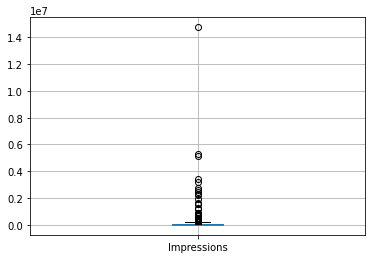

In [18]:
data_ad.boxplot(column = ["Impressions"])

In [19]:
print("Longest Duration:")
display(data_ad.loc[[data_ad.Duration.argmax()]])

print("Highest number of impressions:")
display(data_ad.loc[[data_ad.Impressions.argmax()]])

Longest Duration:


/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
vid-tv-zoom-subtitled-1:1,2727091,14388.0,72.0,22237.77,4150.3,18.0,454.0,585,0.005276,0.031554


Highest number of impressions:


/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """


,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
upsizing_single,14744629,39839.0,129.0,103903.94,31707.7,93.0,3148.0,423,0.002702,0.079018


### Remove infinite values: 

#### Exclude the rows with .drop(): 

In [20]:
# Locate empty values in the df: 
display(data_ad.isnull().sum())

data_ad.CR.max()

Impressions                   0
Unique link clicks            0
Post shares                   0
Cost                          0
Cost per website purchase     0
Signup                        0
Registration                  0
Duration                      0
CTR                           0
CR                           39
dtype: int64

inf

In [21]:
#Locate rows with inf in CR: 
rows_with_inf_in_CR = data_ad[(data_ad["Unique link clicks"] == 0) 
                              & 
                              (data_ad.Registration >= 1)] 
display(rows_with_inf_in_CR) 

#Can also select them this way: 
# Locate the rows where CR is infinite (due to dividing by 0):
#bool_series = np.isinf(data_ad["CR"])
#data_ad[bool_series]

,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
"Post: ""That camp... I still get flashbacks...""",6486,0.0,0.0,12.00,0.0,0.0,2.0,5,0.0,inf
"Post: ""Today is #WorldMentalHealthDay 💚""",1528,0.0,22.0,6.99,0.0,0.0,1.0,2,0.0,inf


In [22]:
#Select those 2 rows this way: 
data_ad.loc[['''Post: "Today is #WorldMentalHealthDay 💚"''', 
             '''Post: "That camp... I still get flashbacks..."'''], 
            :]

,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration,CTR,CR
Ad name,,,,,,,,,,
"Post: ""Today is #WorldMentalHealthDay 💚""",1528,0.0,22.0,6.99,0.0,0.0,1.0,2,0.0,inf
"Post: ""That camp... I still get flashbacks...""",6486,0.0,0.0,12.00,0.0,0.0,2.0,5,0.0,inf


In [23]:
#Check the length of our df before dropping values: 
print(len(data_ad)) 
print(len(data_ad[data_ad["CR"] == 0])) 
print(len(data_ad[data_ad["Unique link clicks"] == 0])) 
print(len(rows_with_inf_in_CR)) 

305
103
41
2


In [24]:
#Drop the rows with inf in the CR column: 
data_ad_without_inf = data_ad.drop(rows_with_inf_in_CR.index) 
display(data_ad_without_inf.shape) 

(303, 10)

In [25]:
# Check the length one more time:
print(len(data_ad_without_inf))
print(len(data_ad_without_inf[data_ad_without_inf["CR"] == 0]))
print(len(data_ad_without_inf[data_ad_without_inf["Unique link clicks"] == 0]))
print(len(data_ad_without_inf[(data_ad_without_inf["Unique link clicks"] == 0) & 
                              (data_ad_without_inf.Registration >= 1)] ))

303
103
39
0


In [26]:
data_ad_without_inf.CR.describe()

count    264.000000
mean       0.056357
std        0.120633
min        0.000000
25%        0.000000
50%        0.028750
75%        0.067774
max        1.250000
Name: CR, dtype: float64

In [27]:
type(data_ad_without_inf.Duration[0])

numpy.int64

In [29]:
data_ad_without_inf.loc[['''Post: "Today is #WorldMentalHealthDay 💚"''', 
             '''Post: "That camp... I still get flashbacks..."'''], 
            :]

KeyError: 'None of [Index([\'Post: "Today is #WorldMentalHealthDay 💚"\', \'Post: "That camp... I still get flashbacks..."\'], dtype=\'object\', name=\'Ad name\')] are in the [index]'

#### Exlude those two rows with '!='

In [ ]:
data_ad_scaled = data_ad[(
    (data_ad.index != '''Post: "Today is #WorldMentalHealthDay 💚"''') & 
    (data_ad.index != '''Post: "That camp... I still get flashbacks..."''')
                        )]

data_ad_scaled.head(3)

In [ ]:
# Located infinite values in CR: 
np.all(np.isfinite(data_ad_for_scaling["CR"]))

In [ ]:
bool_series = np.isinf(data_ad_for_scaling["CR"])
data_ad_scaled[bool_series]

### Scaling

In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

scaler = StandardScaler()

kmeans = KMeans()

scaler.fit(data_ad_without_inf)

/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

# Machine Learning 

### Clustering

#### Elbow: 

In [32]:
from sklearn.cluster import KMeans 
 
intertias = [] 
X = data_ad_without_inf 
ks = range(1, 10) 
 
for k in ks: 
    km_elbow = KMeans(n_clusters = k, random_state = 1).fit(X) 
    intertias.append(km_elbow.inertia_) 
 
plt.plot(ks, intertias) 
plt.xlabel(ks) 
plt.show() 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
from sklearn.cluster import KMeans 

intertias = []
X = data
ks = range(1, 10) 

for k in ks: 
    km_elbow = KMeans(n_clusters = k, random_state = 5).fit(X)
    intertias.append(km_elbow.inertia_)

plt.plot(ks, intertias)
plt.xlabel(ks)
plt.show()

ValueError: could not convert string to float: 'uk_optroas_prospecting_lal5-audiencemix_mfdfig_admulti_pcmulti_homepage_22.04.20'

-> Use 3 Cluster!

#### No Pipeline: 

In [34]:
from sklearn.pipeline import make_pipeline 

scaler = StandardScaler() 

scaler.fit(data_ad_without_inf) 

data_ad_scaled = scaler.transform(data_ad_without_inf) 
display(data_ad_scaled)

/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


array([[-0.17741531, -0.1818864 , -0.17514383, ..., -0.26734086,
        -0.15653435, -0.03599807],
       [-0.22711822, -0.20595273, -0.17514383, ..., -0.32098607,
         2.12496964, -0.46806954],
       [-0.23177421, -0.2312376 , -0.17514383, ..., -0.37463129,
         0.7437481 , -0.46806954],
       ...,
       [-0.230073  , -0.23093296, -0.18124718, ..., -0.26734086,
        -0.00969685, -0.46806954],
       [ 1.24676298,  1.36475578,  0.2398836 , ...,  6.67971489,
        -0.07563687, -0.15325632],
       [-0.16444156, -0.21052228, -0.12631708, ..., -0.13322781,
        -0.51333088, -0.04754428]])

In [35]:
display(len(data_ad_scaled))

303

#### With Pipeline: 

In [36]:
scaler = StandardScaler() 
kmeans = KMeans(n_clusters = 2)

pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(data_ad_without_inf)

/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Lucas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').